In [72]:
import pandas as pd
from pandas import *
from seaborn import *
from matplotlib.pyplot import *
from datetime import date
import numpy as np
from statsmodels.formula.api import *
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
import nltk

np.set_printoptions(threshold=np.inf)

In [2]:
war = pd.read_csv('thor_vbo_new.csv')

C:\Users\Felipe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,13,18,19,20,22,26,29,30,32,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
countrys_mission = war['COUNTRYFLYINGMISSION'].value_counts()

In [4]:
aircraft_mission = war['VALID_AIRCRAFT_ROOT'].value_counts()

## Qual o tipo de TGT mais utilizado durante a guerra?

In [5]:
tgttype = war.groupby('TGTTYPE').size()

In [6]:
most_tgttype = tgttype.sort_values(ascending=False)

## Quais as armas utilizadas para destruir e causar estrago?

In [7]:
dfResultCountry = war.groupby(['RESULTSBDA', 'TGTCOUNTRY']).size()

In [8]:
dfResultType = war.groupby(['RESULTSBDA','TGTTYPE']).size()

In [9]:
dfResultFuncGB = war.groupby(['RESULTSBDA', 'MFUNC_DESC']).size()

In [10]:
dfResultWeapons = war.groupby(['RESULTSBDA', 'WEAPONTYPE']).size()

In [11]:
mFuncDescDestroyed= dfResultFuncGB['DESTROYED']

In [12]:
weaponTypeDestroyed= dfResultWeapons['DESTROYED']

In [13]:
funcDestroy = mFuncDescDestroyed.head(10).sort_values(ascending=False)

In [14]:
dfFuncDestroy = pd.DataFrame(data=funcDestroy)

In [15]:
dfFuncDestroy

,0
MFUNC_DESC,
CLOSE AIR SUPPORT,6671
AIR INTERDICTION,1293
ARMED RECCE,534
DIRECT AIR SUPPORT,32
ARMED HELICOPTER,11
ECM,2
EXTRACTION (PLADS),1
EXTRACTION (GPES),1
ESCORT-RECON,1


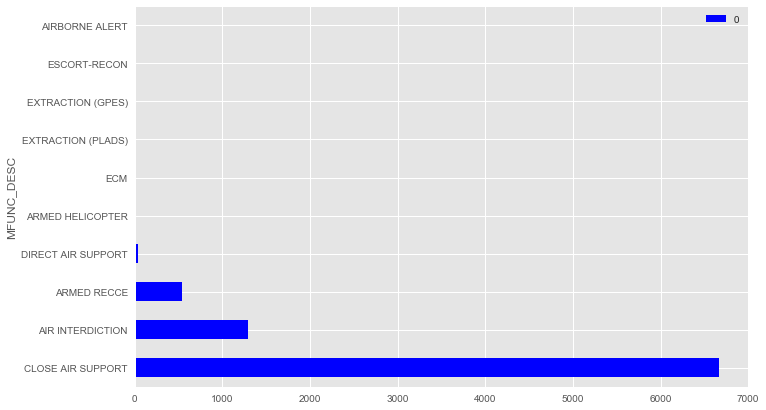

In [17]:
dfFuncDestroy.plot(kind='barh', figsize=(11,7), color='blue');

In [57]:
dfResultFunc = war[['RESULTSBDA', 'MFUNC_DESC','WEAPONTYPE', 'TGTTYPE', 'TGTCOUNTRY']]
dfnew = pd.DataFrame(data=dfResultFunc)
dfnew[dfnew.RESULTSBDA == 'DESTROYED'].set_index('RESULTSBDA').sort_values('MFUNC_DESC')

,MFUNC_DESC,WEAPONTYPE,TGTTYPE,TGTCOUNTRY
RESULTSBDA,,,,
DESTROYED,AIR INTERDICTION,NaN,SAMPANS,SOUTH VIETNAM
DESTROYED,AIR INTERDICTION,NaN,SUPPLIES\RICE\WEAPONS,CAMBODIA
DESTROYED,AIR INTERDICTION,NaN,TRENCH,SOUTH VIETNAM
DESTROYED,AIR INTERDICTION,NaN,FOX HOLES,SOUTH VIETNAM
DESTROYED,AIR INTERDICTION,NaN,AA SITE,NaN
DESTROYED,AIR INTERDICTION,CBU25 AN PR/MT (BLU24),FOX HOLES,SOUTH VIETNAM
DESTROYED,AIR INTERDICTION,NaN,SAMPANS,CAMBODIA
DESTROYED,AIR INTERDICTION,NaN,ARTILLERY,LAOS
DESTROYED,AIR INTERDICTION,NaN,ARTILLERY,NaN


In [55]:
tgtTypesDestroyed= dfResultType['DESTROYED'].sort_values(ascending=False).head(20)

0    int64
dtype: object

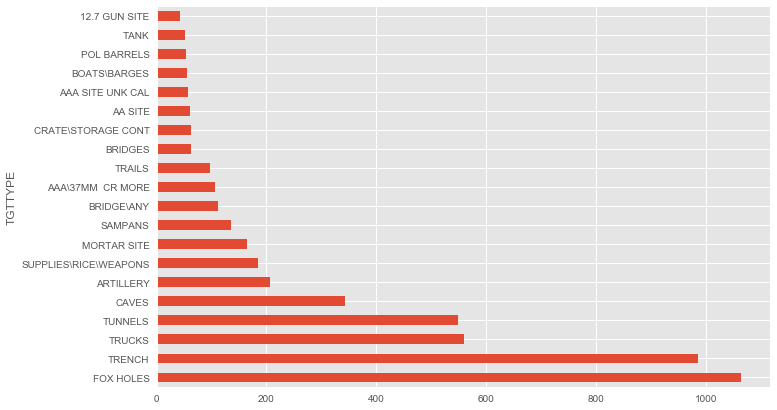

In [56]:
tgtTypesDestroyed.plot(kind='barh', figsize=(11,7));

In [ ]:
countrysDestroyed = dfResultCountry['DESTROYED']

In [ ]:
countrysDestroyed

In [ ]:
countrysDestroyed.plot(grid=False, figsize=(11,7));
plt.title("Countrys more destroyed");
plt.xlabel("Countrys TGT destroyed");
plt.ylabel("TGT destroyed");


In [ ]:
countrys_mission

Gráfico de paises onde partiram os aviões da segunda guerra mundial.

In [18]:
DateWar = war[['RESULTSBDA', 'MSNDATE']]

In [93]:
dfDateWar = pd.DataFrame(data=DateWar)

In [94]:
dfDateWarNew = dfDateWar[dfDateWar['RESULTSBDA'] =='DAMAGED']

In [87]:
dfDateWarNewW = dfDateWarNew.sort_values('MSNDATE')

In [96]:
newdate = pd.to_datetime(dfDateWarNewW['MSNDATE'])

In [100]:
dfnewdate = pd.DataFrame(data=newdate)

In [120]:
datetime.year(dfnewdate['MSNDATE'])

TypeError: 'getset_descriptor' object is not callable

In [113]:
dfDateWarNewW.head(5)

,RESULTSBDA,MSNDATE
20712,DAMAGED,1970-01-02
310191,DAMAGED,1970-01-02
104266,DAMAGED,1970-01-06
598451,DAMAGED,1970-01-06
236128,DAMAGED,1970-01-07


In [112]:
newdf = pd.merge(dfnewdate,dfDateWarNewW);

In [119]:
dfnewdate.dtypes

MSNDATE    datetime64[ns]
dtype: object